In [15]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("../Data/cleaned_data.csv")

In [10]:
X = df.drop(columns=[
    'drug_name',              
    'drug_id',                
    'ic50_effect_size',       
])
y = df['ic50_effect_size'] 

# Label
le_drug_name = LabelEncoder()
# y_encoded = le_drug_name.fit_transform(df["ic50_effect_size"])
# joblib.dump(le_drug_name, "le_drug_name.pkl")

encoders = {}
for col in ["drug_target", "target_pathway", "feature_name", "tissue_type", "screening_set"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le
    joblib.dump(le, f"le_{col}.pkl")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.00022340127383699808
MAE: 0.004955335141883532
R² Score: 0.9975840600162017


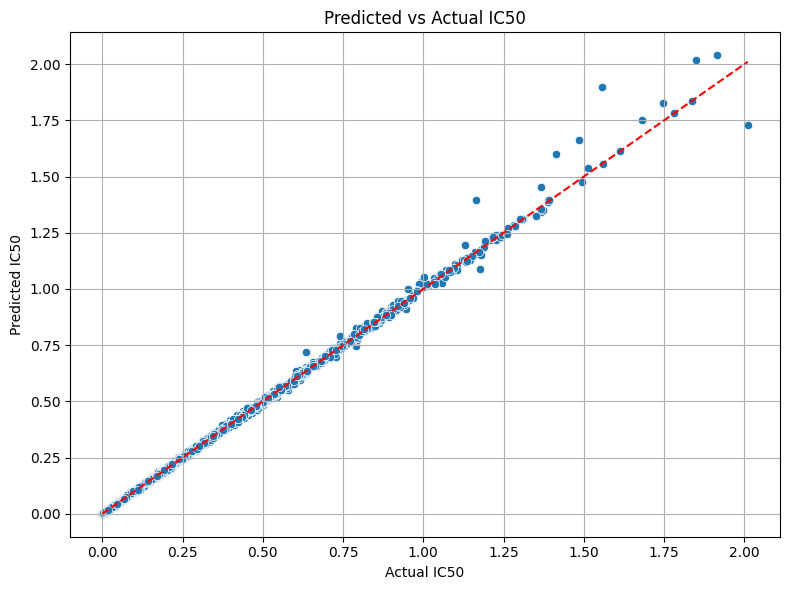

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual IC50")
plt.ylabel("Predicted IC50")
plt.title("Predicted vs Actual IC50")
plt.grid(True)
plt.tight_layout()
plt.show()


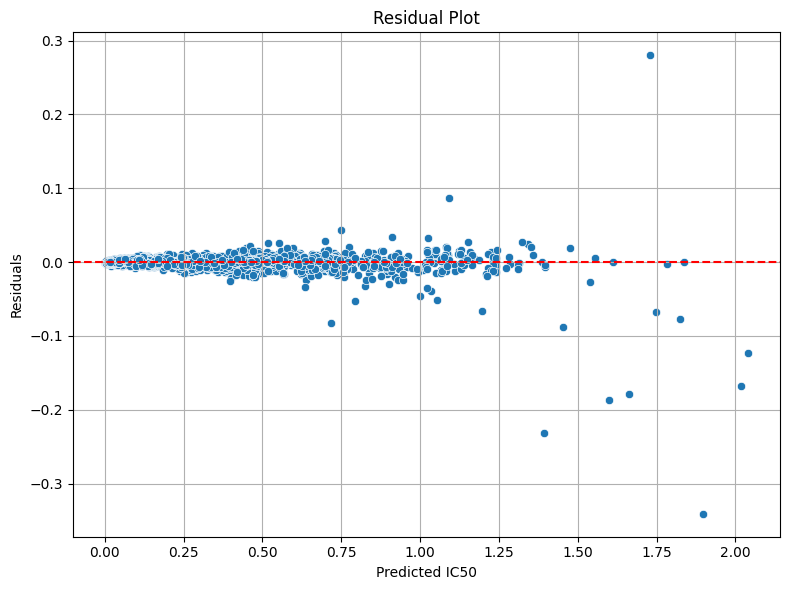

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted IC50")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
y_train_pred = model.predict(X_train)

print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))

Train R² Score: 0.999906623923081
Train MAE: 0.002220964287400702


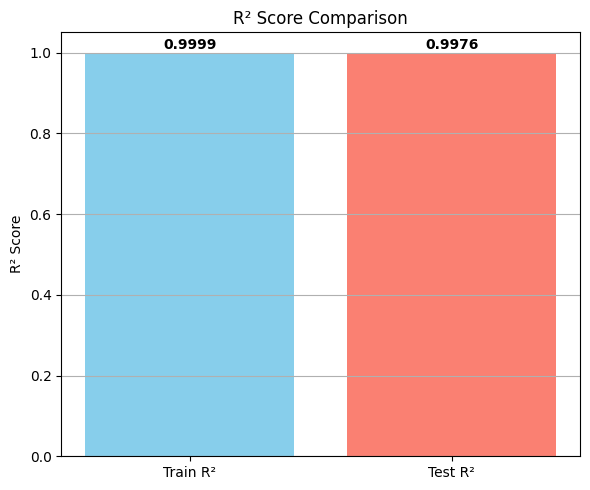

In [20]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
plt.bar(['Train R²', 'Test R²'], [r2_train, r2_test], color=['skyblue', 'salmon'])
plt.ylim(0, 1.05)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
for i, score in enumerate([r2_train, r2_test]):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [21]:
joblib.dump(model, "ic50_regression_model.pkl")

['ic50_regression_model.pkl']